# TASK 1


## Projectile Motion under Gravity

### Physical System
We study the motion of a projectile in two dimensions under the influence of gravity.

### Assumptions
- Air resistance is neglected  
- Gravity is constant and acts vertically downward  
- Motion occurs near Earth's surface  

### Forces
The only force acting on the projectile is gravity:

$$
\vec{F} = m\vec{g}
$$

which leads to a constant acceleration:

$$
\vec{a} = (0, -g)
$$

### Equations of Motion
The system is described by the following first-order ordinary differential equations:

$$
\frac{dx}{dt} = v_x, \quad \frac{dy}{dt} = v_y
$$

$$
\frac{dv_x}{dt} = 0, \quad \frac{dv_y}{dt} = -g
$$

These equations form a coupled ODE system suitable for numerical integration.


## Why Use Numerical Methods?

Although projectile motion has an exact analytical solution, numerical methods are important because:

- Many real systems do not have closed-form solutions
- Forces may depend on position or velocity
- Numerical methods generalize easily to complex problems

Euler's method provides a simple way to step forward in time by approximating derivatives using finite differences.


## Euler Method: Time Discretization

### Idea
A time derivative is approximated by a finite difference:

$$
\frac{dx}{dt} \approx \frac{x_{n+1} - x_n}{\Delta t}
$$

which gives the update rule:

$$
x_{n+1} = x_n + v_x^n \Delta t
$$

### Euler Update Equations
Applying this to all variables:

$$
x_{n+1} = x_n + v_x^n \Delta t
$$

$$
y_{n+1} = y_n + v_y^n \Delta t
$$

$$
v_x^{n+1} = v_x^n
$$

$$
v_y^{n+1} = v_y^n - g \Delta t
$$

Each new value depends only on the previous timestep.


In [48]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81

# Initial conditions
v0 = 20.0
theta = 45 * np.pi / 180

vx0 = v0 * np.cos(theta)
vy0 = v0 * np.sin(theta)

x0, y0 = 0.0, 0.0

# Time parameters
dt = 0.01
t_max = 3.0
N = int(t_max / dt)

# Arrays
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
t = np.zeros(N)

# Initial values
x[0], y[0] = x0, y0
vx[0], vy[0] = vx0, vy0

# Euler integration loop
for i in range(N - 1):
    x[i+1] = x[i] + vx[i] * dt
    y[i+1] = y[i] + vy[i] * dt

    vx[i+1] = vx[i]
    vy[i+1] = vy[i] - g * dt

    t[i+1] = t[i] + dt

    if y[i+1] < 0:
        break


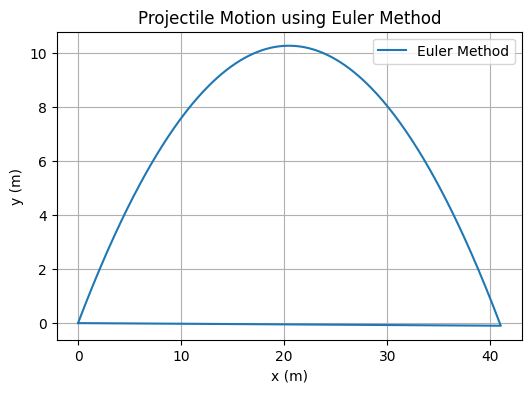

In [49]:
plt.figure(figsize=(6, 4))
plt.plot(x, y, label="Euler Method")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Projectile Motion using Euler Method")
plt.grid()
plt.legend()
plt.show()


# TASK 2

## Diffusion Equation

In one spatial dimension, the diffusion equation is:

$$
\frac{\partial \rho(x,t)}{\partial t}
=
D \frac{\partial^2 \rho(x,t)}{\partial x^2}
$$

where:
- $\rho(x,t)$ is the density
- $D$ is the diffusion coefficient

### Physical Interpretation
- Time derivative → how density changes
- Second spatial derivative → curvature of density profile
- Flat profiles do not evolve


## Discretization of Space and Time

We discretize space into equally spaced grid points:

$$
x_i = i \Delta x
$$

and time into steps:

$$
t^n = n \Delta t
$$

### Finite Difference Approximations

Time derivative (forward difference):

$$
\frac{\partial \rho}{\partial t}
\approx
\frac{\rho_i^{n+1} - \rho_i^n}{\Delta t}
$$

Second spatial derivative (central difference):

$$
\frac{\partial^2 \rho}{\partial x^2}
\approx
\frac{\rho_{i+1}^n - 2\rho_i^n + \rho_{i-1}^n}{(\Delta x)^2}
$$


## Explicit Finite Difference Update Rule

Substituting the finite differences into the diffusion equation:

$$
\frac{\rho_i^{n+1} - \rho_i^n}{\Delta t}
=
D \frac{\rho_{i+1}^n - 2\rho_i^n + \rho_{i-1}^n}{(\Delta x)^2}
$$

Rearranging:

$$
\rho_i^{n+1}
=
\rho_i^n
+
\alpha
\left(
\rho_{i+1}^n - 2\rho_i^n + \rho_{i-1}^n
\right)
$$

where:

$$
\alpha = \frac{D \Delta t}{(\Delta x)^2}
$$

This scheme updates the density at each grid point using its neighbors.


In [50]:
# Physical parameters
D = 1.0  # diffusion coefficient

# Grid parameters
L = 10.0
Nx = 200
dx = L / Nx

# Time parameters
dt = 0.0005
Nt = 20000

alpha = D * dt / dx**2
print("alpha =", alpha)

# Spatial grid
x = np.linspace(0, L, Nx)

# Initial condition: central peak
rho = np.zeros(Nx)
rho[Nx // 2] = 1.0


alpha = 0.19999999999999996


## Boundary Conditions

### Absorbing Boundary
Density vanishes at the boundaries:

$$
\rho(0,t) = \rho(L,t) = 0
$$




In [51]:
rho_new = rho.copy()

# Time evolution
snapshots = []

for n in range(Nt):
    for i in range(1, Nx-1):
        rho_new[i] = (
            rho[i]
            + alpha * (rho[i+1] - 2*rho[i] + rho[i-1])
        )

    # Absorbing boundaries
    rho_new[0] = 0.0
    rho_new[-1] = 0.0

    rho = rho_new.copy()

    if n in [0, 200, 500, 1000, 1999]:
        snapshots.append(rho.copy())


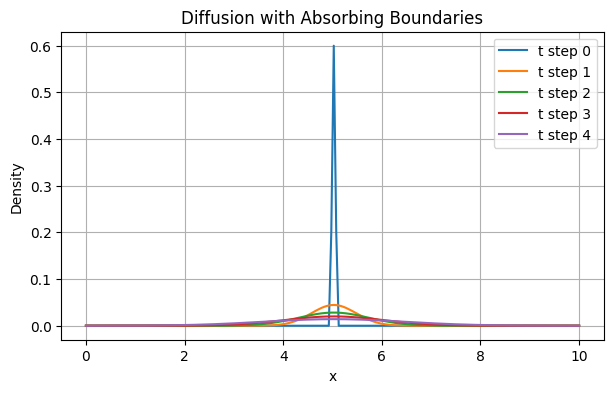

In [52]:
plt.figure(figsize=(7, 4))

for i, snap in enumerate(snapshots):
    plt.plot(x, snap, label=f"t step {i}")

plt.xlabel("x")
plt.ylabel("Density")
plt.title("Diffusion with Absorbing Boundaries")
plt.legend()
plt.grid()
plt.show()


## Reflective Boundary Conditions

For reflective boundaries, the spatial derivative vanishes:

$$
\frac{\partial \rho}{\partial x} = 0
$$

This is implemented numerically as:

$$
\rho_0 = \rho_1, \quad \rho_{N-1} = \rho_{N-2}
$$

This prevents loss of density.


In [68]:
# Reset initial condition
rho = np.zeros(Nx)
rho[Nx // 50] = 1.0
rho_new = rho.copy()

snapshots_reflect = []

for n in range(Nt):
    for i in range(1, Nx-1):
        rho_new[i] = (
            rho[i]
            + alpha * (rho[i+1] - 2*rho[i] + rho[i-1])
        )

    # Reflective boundaries
    rho_new[0] = rho_new[1]
    rho_new[-1] = rho_new[-2]

    rho = rho_new.copy()

    if n in [0, 200, 500, 1000, 1999]:
        snapshots_reflect.append(rho.copy())


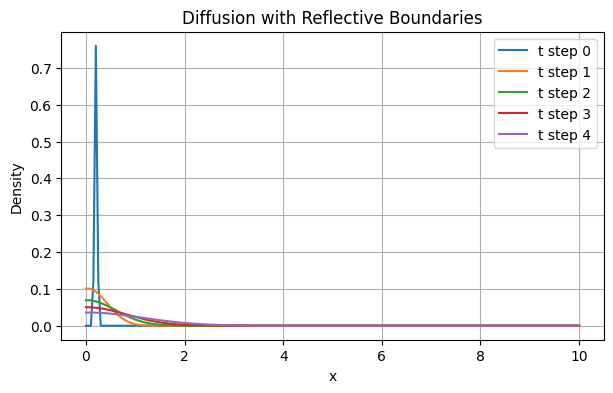

In [69]:
plt.figure(figsize=(7, 4))

for i, snap in enumerate(snapshots_reflect):
    plt.plot(x, snap, label=f"t step {i}")

plt.xlabel("x")
plt.ylabel("Density")
plt.title("Diffusion with Reflective Boundaries")
plt.legend()
plt.grid()
plt.show()


# TASK 3

## Burgers’ Equation

The 1D viscous Burgers’ equation is:

$$
\frac{\partial u}{\partial t}
+
u \frac{\partial u}{\partial x}
=
\nu \frac{\partial^2 u}{\partial x^2}
$$

where:
- $u(x,t)$ is velocity
- $\nu$ is the kinematic viscosity


## Numerical Strategy

We discretize:
- Time → Forward Euler
- Space → Finite differences

Advection term:
$$
u\frac{\partial u}{\partial x}
\approx
u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x}
$$
(upwind scheme)

Diffusion term:
$$
\frac{\partial^2 u}{\partial x^2}
\approx
\frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{(\Delta x)^2}
$$


In [72]:
# Physical parameters
nu = 0.02     # viscosity

# Domain
L = 10.0
Nx = 300
dx = L / Nx
x = np.linspace(0, L, Nx)

# Time parameters
dt = 0.001
Nt = 2000


## Initial Condition

We start with a smooth velocity profile:

$$
u(x,0) = \sin\left(\frac{2\pi x}{L}\right)
$$

This will:
- Steepen due to advection
- Be smoothed by viscosity


In [73]:
u = np.sin(2 * np.pi * x / L)
u_new = u.copy()


## Time Evolution Scheme

The update rule is:

$$
u_i^{n+1}
=
u_i^n
-
u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x}\Delta t
+
\nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{(\Delta x)^2}\Delta t
$$

This combines:
- Nonlinear advection
- Viscous diffusion


In [74]:
snapshots = []

for n in range(Nt):
    for i in range(1, Nx - 1):
        advection = u[i] * (u[i] - u[i-1]) / dx
        diffusion = (u[i+1] - 2*u[i] + u[i-1]) / dx**2

        u_new[i] = u[i] - dt * advection + nu * dt * diffusion

    # Periodic boundaries
    u_new[0] = u_new[-2]
    u_new[-1] = u_new[1]

    u[:] = u_new[:]

    if n in [0, 300, 700, 1200, 1999]:
        snapshots.append(u.copy())


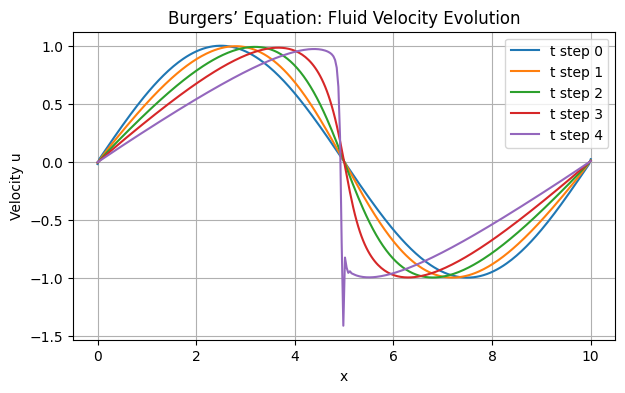

In [75]:
plt.figure(figsize=(7,4))

for i, snap in enumerate(snapshots):
    plt.plot(x, snap, label=f"t step {i}")

plt.xlabel("x")
plt.ylabel("Velocity u")
plt.title("Burgers’ Equation: Fluid Velocity Evolution")
plt.legend()
plt.grid()
plt.show()


## Interpretation

- Nonlinear advection steepens the waveform
- Viscosity prevents infinite gradients
- The equation models shock formation and dissipation


